In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import plotly as py
from plotly.offline import iplot
import plotly.graph_objs as go
import numpy as np
import colorlover as cl
from IPython.display import HTML
py.offline.init_notebook_mode(connected=True)

In [2]:
def imshow(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_GRAY2RGB))

In [3]:
img_src=cv2.imread('test_img.bmp')
img_src=cv2.cvtColor(img_src,cv2.COLOR_BGR2RGB)

In [4]:
lx,ly,lz=img_src.shape
print(lx,ly,lz)
k1=min(lx,ly)//50
k2=k1//10
if k1 % 2 ==0:
    k1+=1
print(k1,k2)

5100 7020 3
103 10


In [21]:
img_src_zip=cv2.resize(img_src,(lx//(lx//1600),ly//(ly//900)),interpolation=cv2.INTER_AREA)
print(img_src_zip.shape)

(1002, 1700, 3)


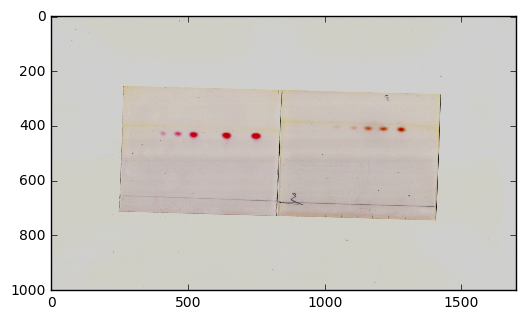

In [14]:
plt.imshow(img_src_zip)

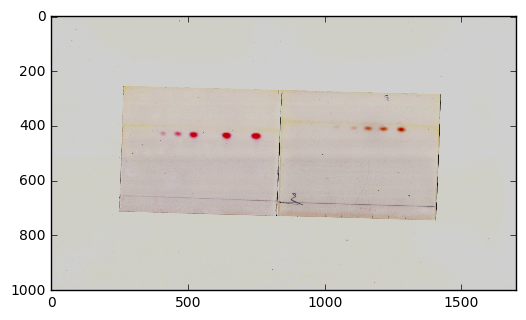

In [11]:
plt.imshow(img_src_zip)

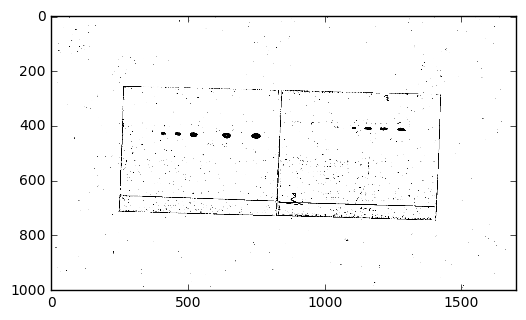

In [22]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
# img=cv2.cvtColor(img_src_zip,cv2.COLOR_BGR2RGB)
# Извлекаем канал красного цвета
# img_gray=cv2.extractChannel(img_src_zip,2)
# imshow(img_gray)
img_gray=cv2.cvtColor(img_src_zip,cv2.COLOR_RGB2GRAY)
# _,img_gray=cv2.threshold(img_gray,250,255,cv2.THRESH_BINARY)
# Нормализуем изображение
img_gray=cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,27,5)
imshow(img_gray)
# Эрозия и дилитация
img_gray=cv2.morphologyEx(img_gray,cv2.MORPH_CLOSE,kernel)
# Готовим к отображению
img=cv2.cvtColor(img_gray,cv2.COLOR_GRAY2RGB)

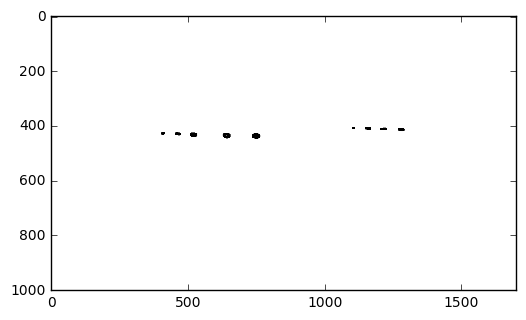

In [23]:
plt.imshow(img)

In [38]:
x=np.fromiter(range(0,365),dtype='int')
y=np.fromiter(range(0,283),dtype='int')
z=img_gray
z=np.invert(z)

In [39]:
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT,29,1)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    
    print('Завершено')
    print(len(circles))
else:
    print('Нечего не найдено')

Завершено
125


In [12]:
circles.shape

(125, 3)

In [13]:
output=img.copy()
# circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1.2, 50)

# ensure at least some circles were found
# convert the (x, y) coordinates and radius of the circles to integers


# loop over the (x, y) coordinates and radius of the circles
for (x, y, r) in circles:
    # draw the circle in the output image, then draw a rectangle
    # corresponding to the center of the circle
    cv2.circle(output, (x, y), r, (0, 255, 0), 1)
    cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

# show the output image
img_cicle=np.hstack([img, output])

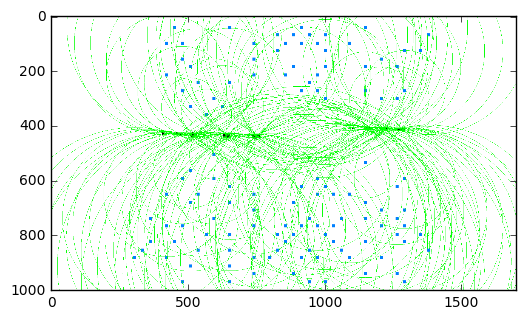

In [14]:
plt.imshow(output)

In [61]:
m2, contours, hierharchy=cv2.findContours(img_gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

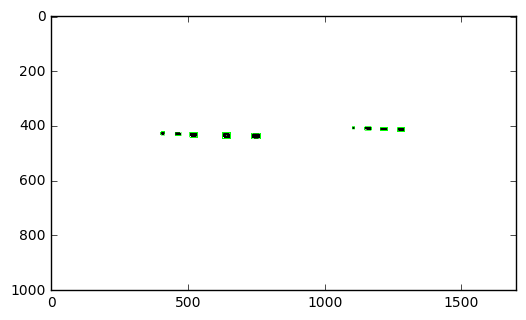

In [62]:
buf_img=img.copy()
cicles=[]
elements=[]
for cnt in contours[:-1]:
#     (x,y),radius=cv2.minEnclosingCircle(cnt)
#     x,y=int(x),int(y)
#     center=(x,y)
#     radius=int(radius)
#     cicles.append(img_gray[x-radius:x+radius,y-radius:y+radius])
#     img=cv2.circle(img,center,radius,(0,255,0),1)
    rect=cv2.minAreaRect(cnt)
    box=cv2.boxPoints(rect)
    box=np.int0(box)
    cv2.drawContours(buf_img,[box],0,(0,255,0),2)
    elements.append(box)
# draw=cv2.drawContours(buf_img, contours[:7], -1, (0,255,0), 3)
plt.imshow(buf_img)

In [63]:
elements

[array([[747, 441],
        [747, 441],
        [747, 441],
        [747, 441]], dtype=int64), array([[640, 439],
        [640, 439],
        [640, 439],
        [640, 439]], dtype=int64), array([[731, 451],
        [731, 430],
        [764, 430],
        [764, 451]], dtype=int64), array([[625, 450],
        [625, 428],
        [655, 428],
        [655, 450]], dtype=int64), array([[506, 445],
        [506, 427],
        [534, 427],
        [534, 445]], dtype=int64), array([[452, 439],
        [452, 426],
        [474, 426],
        [474, 439]], dtype=int64), array([[400, 437],
        [400, 425],
        [415, 425],
        [415, 437]], dtype=int64), array([[1264,  424],
        [1264,  410],
        [1290,  410],
        [1290,  424]], dtype=int64), array([[1200,  420],
        [1200,  409],
        [1227,  409],
        [1227,  420]], dtype=int64), array([[1144,  419],
        [1144,  407],
        [1168,  407],
        [1168,  419]], dtype=int64), array([[1098,  415],
        [1098,

In [64]:
img_src_zip[314:326,215:225,2]

array([[207, 207, 207, 207, 207, 207, 207, 207, 207, 207],
       [202, 207, 206, 206, 206, 207, 207, 207, 207, 207],
       [204, 207, 207, 205, 207, 207, 207, 207, 206, 207],
       [206, 206, 206, 206, 207, 207, 207, 207, 202, 203],
       [205, 203, 206, 207, 207, 207, 207, 207, 206, 205],
       [204, 205, 207, 204, 207, 207, 207, 207, 207, 206],
       [206, 207, 207, 207, 206, 207, 207, 207, 204, 207],
       [207, 207, 207, 207, 207, 207, 207, 207, 206, 207],
       [207, 207, 207, 207, 207, 207, 207, 207, 206, 207],
       [207, 207, 207, 207, 207, 207, 207, 207, 206, 207],
       [207, 207, 207, 206, 207, 207, 207, 206, 206, 207],
       [207, 205, 207, 206, 206, 207, 207, 206, 205, 207]], dtype=uint8)

In [116]:
box=elements[4]
x,y=box.min(0)
w,h=box.max(0)
print(x,y,w,h)
shift=max(h-x,w-y)//10
x-=shift
y-=shift
h+=shift
w+=shift
buf=cv2.cvtColor(img_src_zip,cv2.COLOR_RGB2GRAY)[y:h,x:w]
buf=cv2.resize(buf,(50,50),interpolation=cv2.INTER_AREA)
buf=np.invert(buf)
print(shift)

506 427 534 445
10


In [117]:
buf=buf-buf.min()

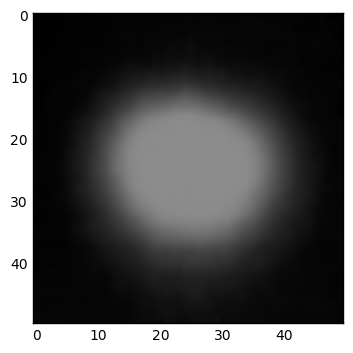

In [118]:
imshow(buf)

In [119]:
data=go.Surface(z=(buf))
layout=go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig=go.Figure(data=[data],layout=layout)
iplot(fig)

In [124]:
s=buf.sum(1)
data=go.Scatter(y=s)
iplot([data])

In [125]:
area=s.sum()

In [126]:
area

101405

In [25]:
s

array([3594, 3041, 2534, 2183, 1972, 1821, 1766, 1711, 1710, 1704, 1757,
       1819, 1886, 1998, 2219, 2425, 2767, 3183], dtype=uint32)